 
* Работаем с данными penguins_size.csv. Содержит следующие переменные:

    * species: разновидности пингвинов - Антарктический пингвин (Chinstrap), Пингвин Адели (Adélie) или Папуанский пингвин (Gentoo)
    * culmen_length_mm: длина клюва (mm)
    * culmen_depth_mm: высота клюва (mm)
    * flipper_length_mm: длина крыла (mm)
    * body_mass_g: масса тела (g)
    * island: название острова (Dream, Torgersen или Biscoe) на архипелаге Палмер (Антарктика)
    * sex: пол пингвина

**Наша цель - создать модель, которая поможет нам определять вид пингвина на основе его физических атрибутов, чтобы исследователи могли с помощью этой модели классифицировать пингвинов, без необходимости привлечения опытного биолога.**

In [165]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [166]:
df = pd.read_csv("penguins_size.csv")

In [167]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Исследование данных - EDA

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [169]:

df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [170]:
# Удаляем отсутствующие данные, так как их немного
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [171]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [172]:
df[df['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [173]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [174]:
#удаляем строку, которая содержит'.'
df = df[df['sex']!='.']

## Визуализация

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

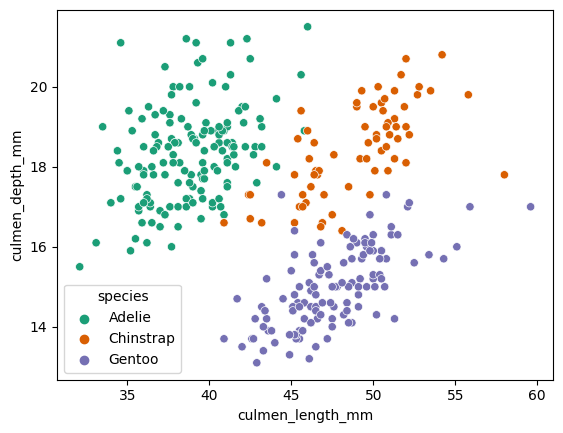

In [175]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

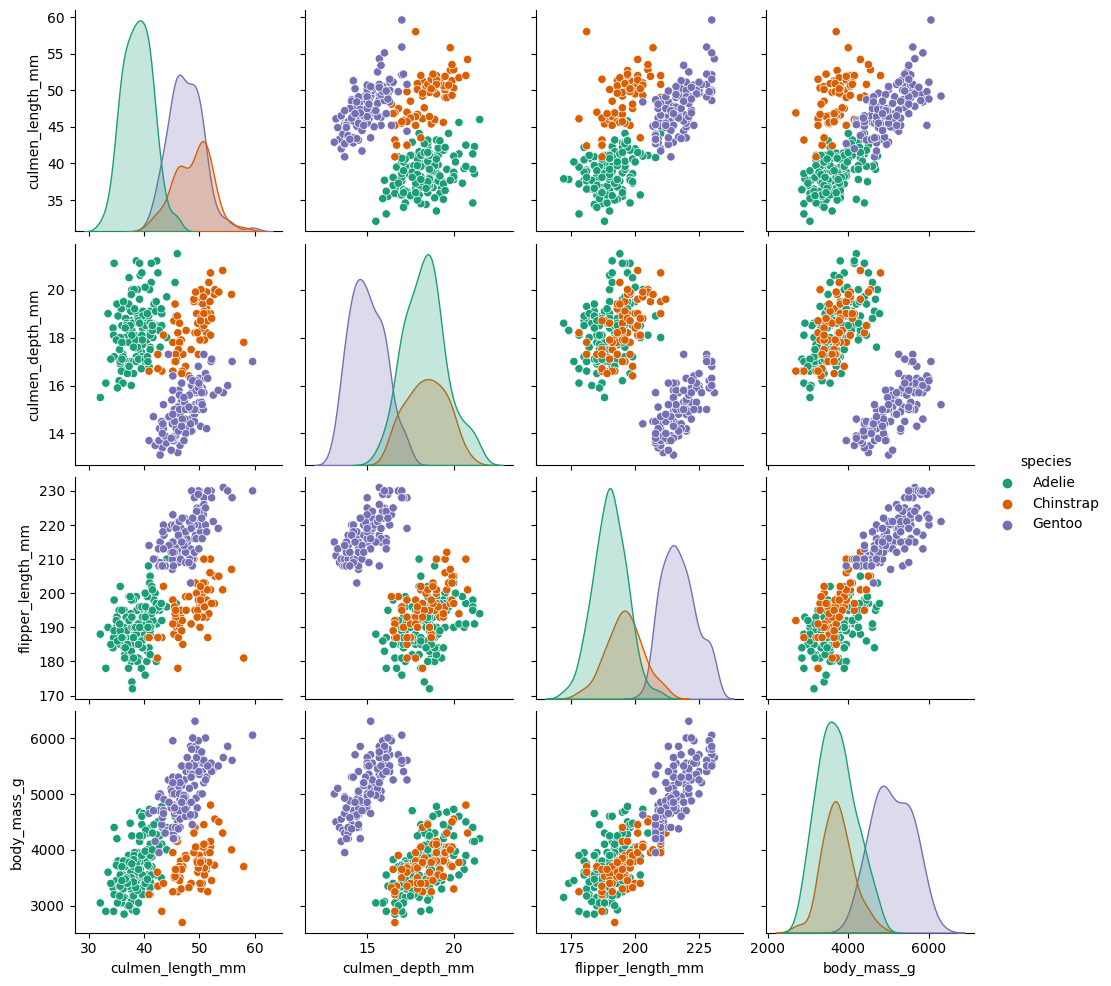

In [176]:
sns.pairplot(df,hue='species',palette='Dark2')

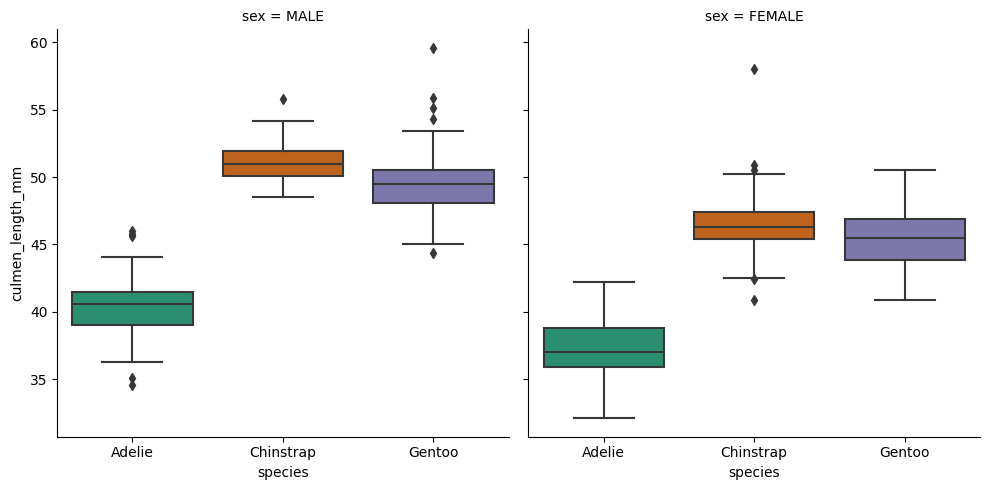

In [177]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Построение признаков - Feature Engineering

In [178]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']
X


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Классификатор "Дерево решений" - Decision Tree Classifier


In [180]:
#Гиперпараметры по умолчанию
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_pred = model.predict(X_test)


In [181]:
# Оцкенка работы модели
confusion_matrix(y_test,base_pred)


array([[39,  1,  0],
       [ 1, 26,  0],
       [ 1,  0, 32]], dtype=int64)

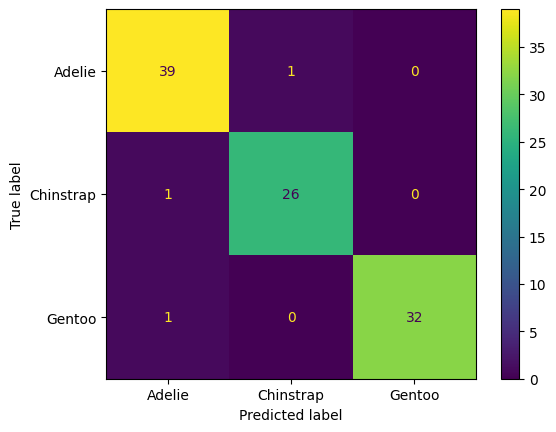

In [182]:
#визуализируем матрицу ошибок
disp=ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [183]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [184]:
# важность отдельных признаков
#Наибольшую важность имеет признак flipper_length
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
body_mass_g,0.000000
island_Torgersen,0.000000
sex_MALE,0.000000
culmen_depth_mm,0.026964
island_Dream,0.038061
culmen_length_mm,0.333501
flipper_length_mm,0.601475


## Визуализация дерева

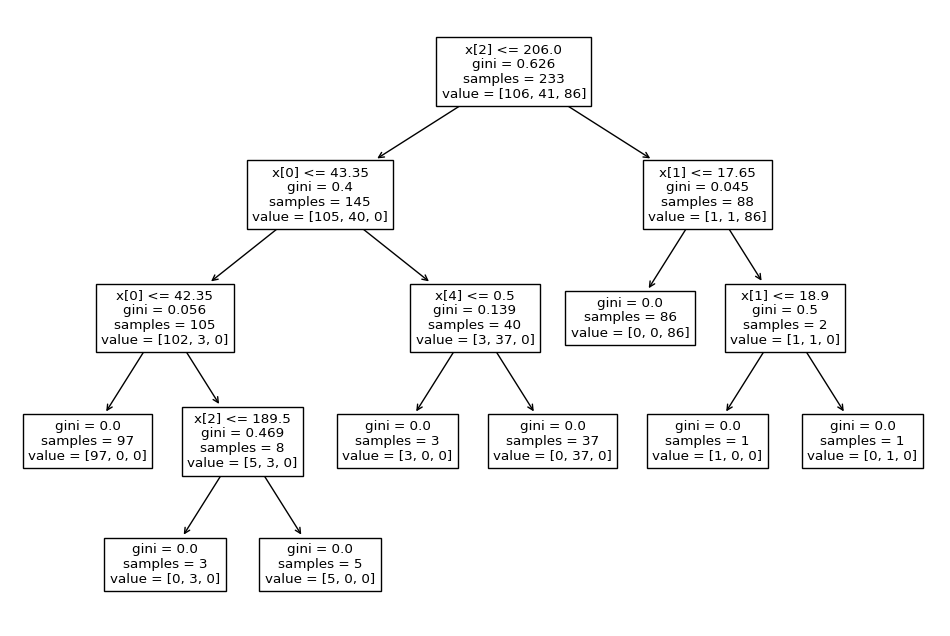

In [185]:

plt.figure(figsize=(12,8))
plot_tree(model);


In [186]:
#plt.figure(figsize=(12,8),dpi=150)
#plot_tree(model,filled=True,feature_names=X.columns);

## Гиперпараметры

### Гиперпараметр "Max Depth"

In [187]:
#Создаем функцю, которая возвращает результаты классификации, а также рисует дерево
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(10,8),dpi=150)
    plot_tree(model,filled=True);

In [188]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





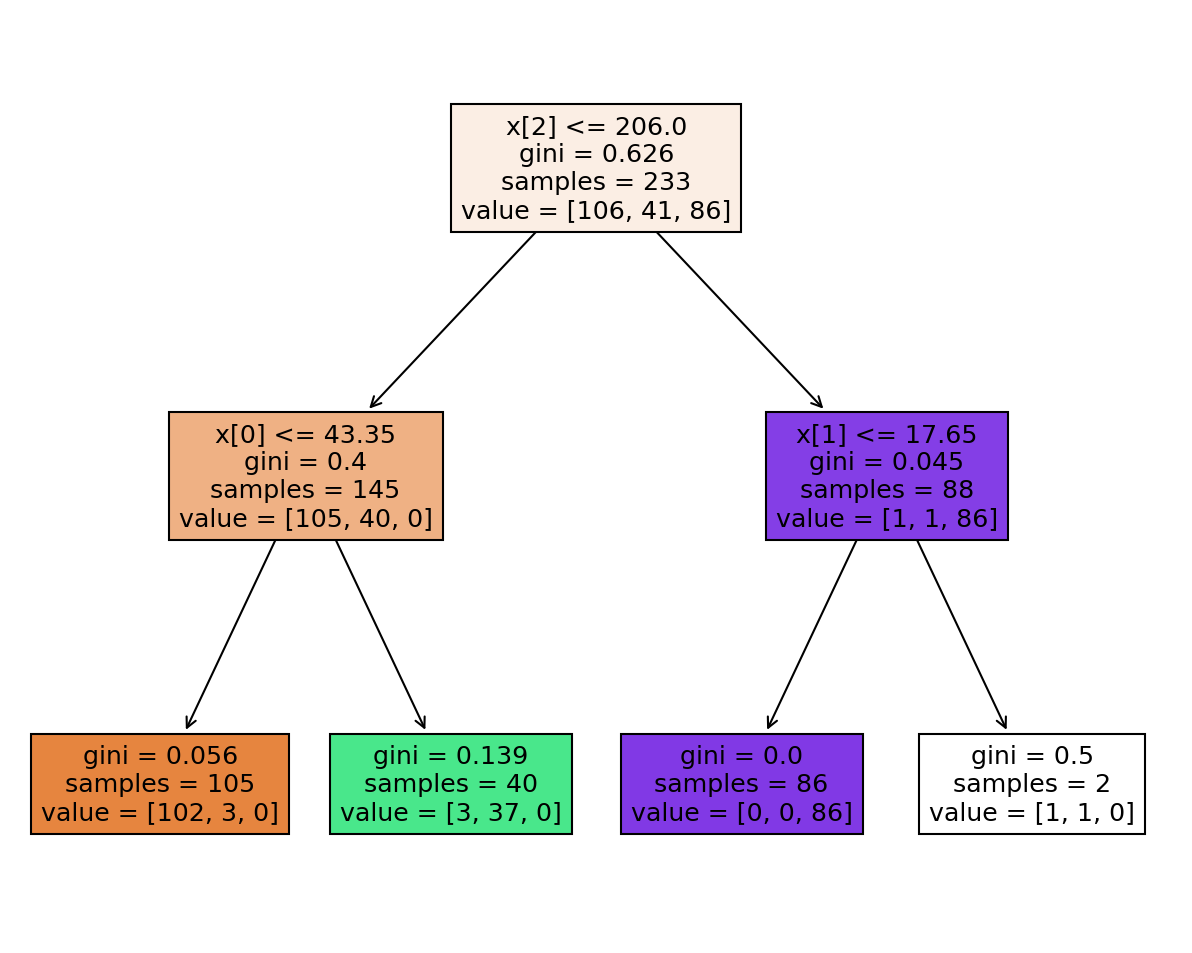

In [189]:
report_model(pruned_tree)

## Гиперпараметр "Max Leaf Nodes"

In [190]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





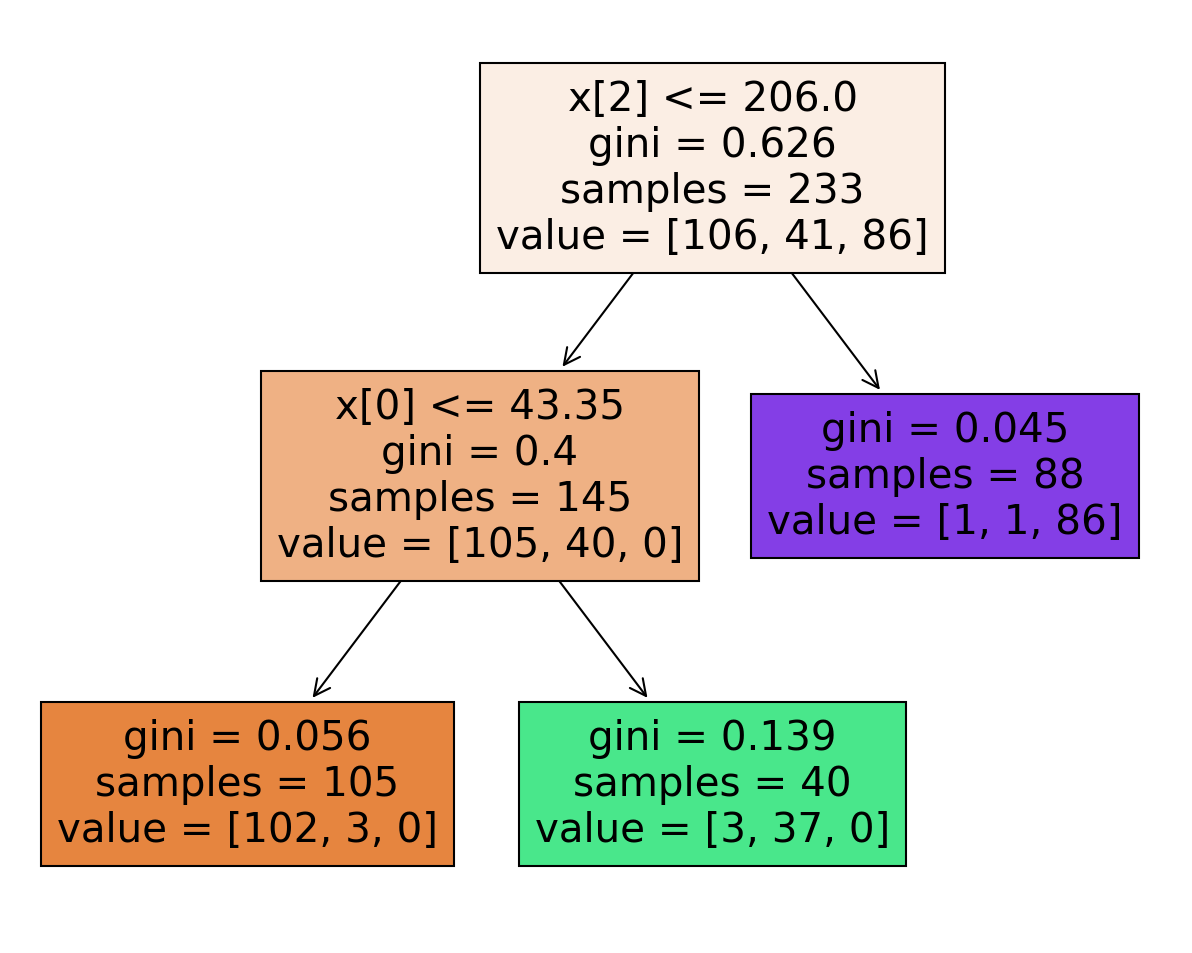

In [191]:
report_model(pruned_tree)

## Гиперпараметр "Criterion"

In [192]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100





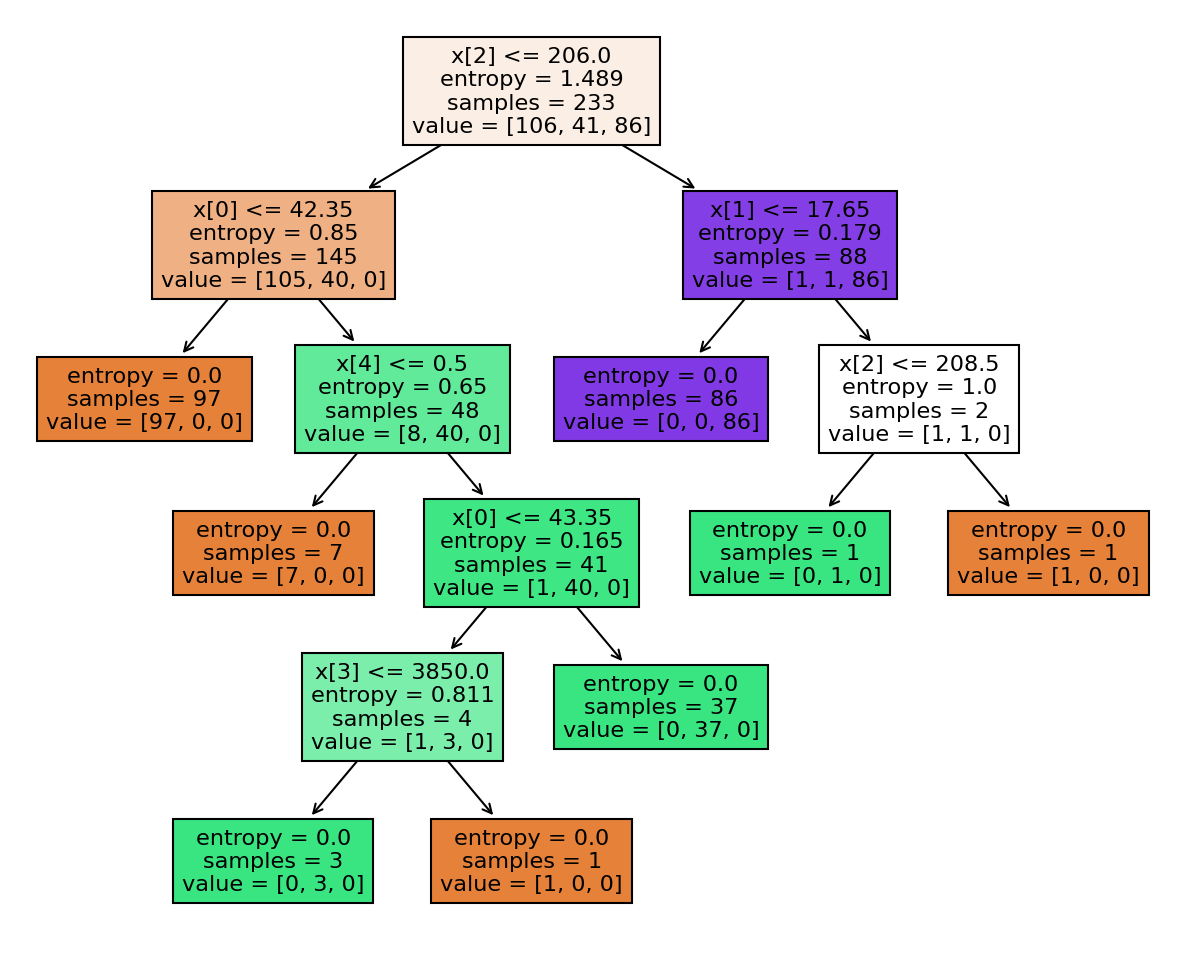

In [193]:
report_model(entropy_tree)